<a href="https://colab.research.google.com/github/PaulToronto/Hands-on-Maching-Learning-Book/blob/main/2_End_to_End_Machine_Learning_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# End-to-End Machine Learning Project

- [Steps of a Machine Learning Project](https://github.com/PaulToronto/Math-and-Data-Science-Reference/blob/main/Steps_of_a_Machine_Learning_Project.ipynb)
    - [Appendix A: Machine Learning Project Checklist](https://learning.oreilly.com/library/view/hands-on-machine-learning/9781098125967/app01.html)
- [List of Data Sources](https://github.com/PaulToronto/Math-and-Data-Science-Reference/blob/main/List_of_Data_Sources.ipynb)

## Imports

In [1]:
!pip install contextily

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import contextily as ctx
import folium
import branca.colormap as cm

from sklearn.model_selection import train_test_split

## The Data

In [3]:
data_url = 'https://raw.githubusercontent.com/PaulToronto/Hands-on-Maching-Learning-Book/main/data/housing.csv'

## Some Terminology

- ***Multiple regression***: multiple features
- ***Multivariate regression***: predict multiple values
- ***Univariate regression***: predict a single value

## Performance Measures

### RMSE

- A typical performance measure for for regression problems is *root mean square error* (RMSE).
    - A higher weight is given to large errors
    - corresponds to the **Euclidian norm** or **l2 norm**

$$
RMSE\left(\textbf{X}, h\right) = \sqrt{
    \frac{1}{m} \sum{_{i=1}^{m}}\left(h\left(\textbf{x}^{(i)}\right) - y^{(i)}\right)^{2}
}
$$

- $m$ is the number of instances in the dataset
- $\mathbf{x}^{(i)}$ is a column vector of all the feature values (excluding the label) of the $i^{th}$ instance
- $y^{(i)}$ is the label of the $i^{th}$ instance
- $\widehat{y}^{(i)} = h\left(\textbf{x}^{(i)}\right)$
- $\mathbf{X}$ is a matrix containing all the feature values (excluding the labels) of all instances in the dataset. There is one row per instance and the $i^{th}$ row is equal to the transpose of $\mathbf{x}^{(i)}$ or $\left(\mathbf{x}^{(i)}\right)^{T}$
- $h$ is your system's prediction function, aka hypothesis

### MAE

- A less common performance measure is *mean absolute error* (MAE).
    - aka *Average Absolute Deviation*
    - Might be a better choice when there are outliers
    - corresponds to the **Manhattan norm** or **l1 norm**

$$
MAE\left(\textbf{X}, h\right) =
    \frac{1}{m} \sum_{i=1}^{m}\lvert h\left(\textbf{x}^{(i)}\right) - y^{(i)}\rvert
$$

### $l_{k}$ norm

- The higher the value if $k$, the more it focuses on large values and ignores smaller ones
- The RMSE, $l_{2}$ norm, performs well when outliers are exponentially rare (as in a bell-shaped curve)

## Steps of a Machine Learning Project

1. Frame the problem and look at the big picture.
2. Get the data.
3. Explore and visualize the data to gain insights.
4. Prepare the data to better expose the underlying data patterns to machine learning algorithms.
5. Explore many different models and shortlist the best ones.
6. Fine-tune your models and combine them into a great solution.
7. Present your solution.
8. Launch, monitor, and maintain your system.

### Step 1: Frame the problem and look at the big picture

1. Define the objective in business terms
2. How will your solution be used?
3. What are the current solutions/workarounds (if any)?
4. How should you frame this problem?
    - Supervised/Unsupervised
    - batch/online
    - etc...
5. How should performance be measured?
6. Is the performance measure aligned with the business objective?
7. What would be the minimum performance needed to reach the business objective?
8. What are comparable problems? Can you resuse experience or tools?
9. Is human expertise available?
10. How would you solve the problem manually?
11. List the assumptions you (or others) have made so far.
12. Verify assumptions if possible.

- California census data
  - Each row is a block group
  - Block groups are the smallest geographical unit for whith the US Census Bureau publishes sample data
  - A block group typically has 600 to 3000 people
- Your model should be able to predict the median housing price in any district (block group)

#### Frame the Problem

- What is the business objective?
- Building the model is probably not the end goal
- How does the company expect to benefit from this model?
- What does the current solution (if there is one) look like?
- In our case:
    - Supervised
    - Regression (numeric labels)
        - A univariate, multiple regression problem
    - Batch learning
        
#### Select a Performance Measure

- RMSE is a typical measure for regression problems
- MAE if there are a lot of outliers

#### Check your assumptions

- Will the numeric target be used downstream?
    - If they plan to convert it to a categorical variable, maybe it's better to model this as a classification problem
    - In this case, the numeric target will be used

### Step 2: Get the Data

1. List the data you need and how much you need.
2. Find and document where you can get that data.
3. Check how much space it will take.
4. Check the legal obligations, and get authorization if necessary.
5. Get access authorizations.
6. Create a workspace (with enough storage space).
7. Get the data
8. Convert the data to a format you can easily manipulate (without changing the data itself).
9. Ensure sensitive information is deleted or protected (e.g. anonymized)
10. Check the size and type of data (time series, sample, geographical, etc.).
11. Sample a test, put it aside, and never look at it (no data snooping).

In [4]:
housing = pd.read_csv(data_url)
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Notes:

- `total_bedrooms` has missing data
- `ocean_proximity` is the only categorical feature, the rest are numeric

In [5]:
# `total_bedrooms` number missing
housing['total_bedrooms'].isnull().sum()

207

In [6]:
housing['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [7]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### Step 3: Explore and visualize the data to gain insights.

Note: try to get insights from a field expert for these steps.

1. Create a copy of the data for explorations (sampling it down to a manageable size if necessary).
2. Create a Jupyter notebook to keep a record of your data exploration.
3. Study each attribute and its characteristics:
    - Name
    - Type
    - % missing
    - Noisiness and type of noise(stochastic, outliers, rounding errors, etc.)
    - Usefulness for the task
    - Type of distribution (Gaussian, uniform, logarithmic, etc.
4. For supervised learning tasks, identify the target attribute(s)
5. Visualize the data
6. Study the correlations between attributes
7. Study how you would solve the problem manually.
8. Identify the promising transformations you may want to apply
9. Identify extra data that would be useful
10. Document what you have learned

#### Preliminary EDA

- `total_bedrooms` has missing data
- all attributes are numerical except `ocean_proximity`

In [8]:
housing['ocean_proximity'].value_counts()

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


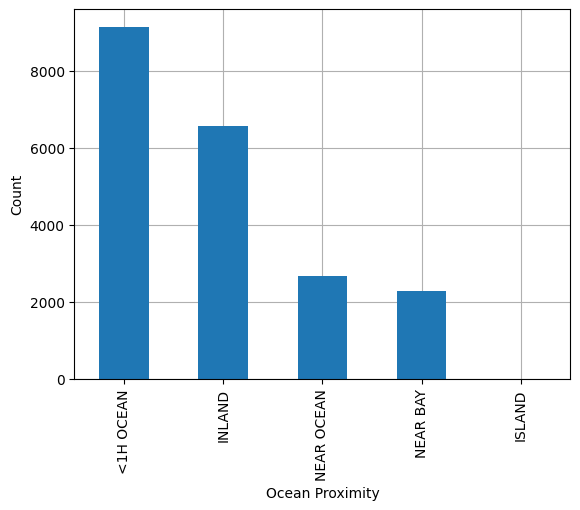

In [9]:
ax = housing['ocean_proximity'].value_counts().plot(kind='bar')

ax.set_xlabel('Ocean Proximity')
ax.set_ylabel('Count')
ax.grid()
ax.set_axisbelow(True) # controls z-order of grid

In [10]:
# use this for the order parameter in `sns.countplot()`
order_param = housing['ocean_proximity'].value_counts().index
order_param

Index(['<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'NEAR BAY', 'ISLAND'], dtype='object', name='ocean_proximity')

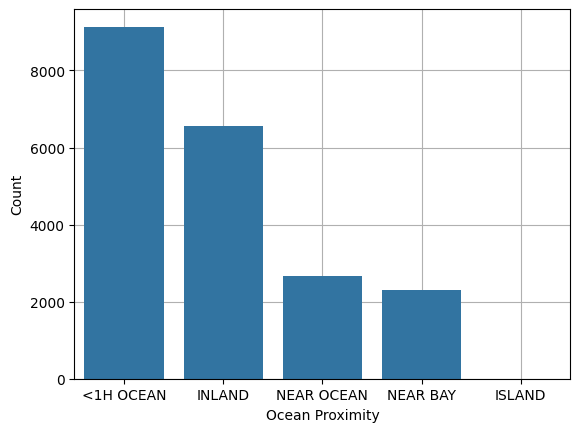

In [11]:
ax = sns.countplot(data=housing,
                   x='ocean_proximity',
                   order=order_param)

ax.set_xlabel('Ocean Proximity')
ax.set_ylabel('Count')
ax.grid()
ax.set_axisbelow(True) # controls z-order of grid

In [12]:
# null values are ignored
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


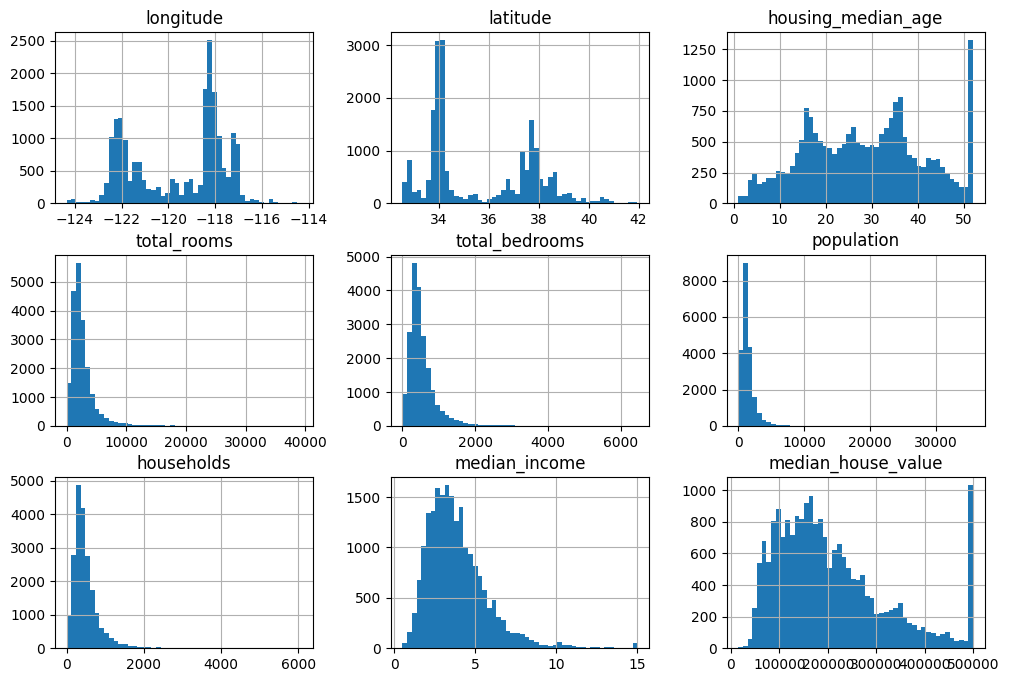

In [13]:
housing.hist(bins=50, figsize=(12, 8))
plt.show()

- `median_income` does not look like its epxressed in US dollars
    - turns out, the data has been scaled and capped at 15,00001 for higher median incomes and at 0.4999 for lower median incomes
    - 3 means roughly 30K

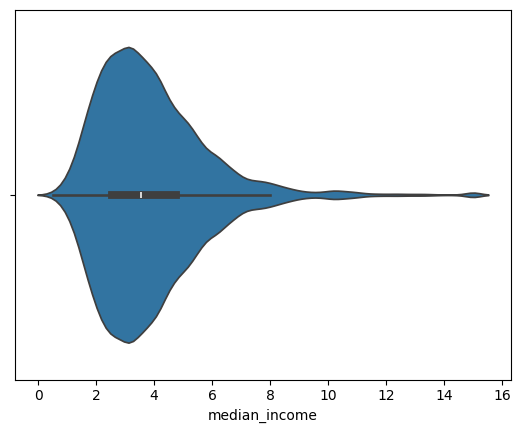

In [14]:
sns.violinplot(data=housing, x='median_income');

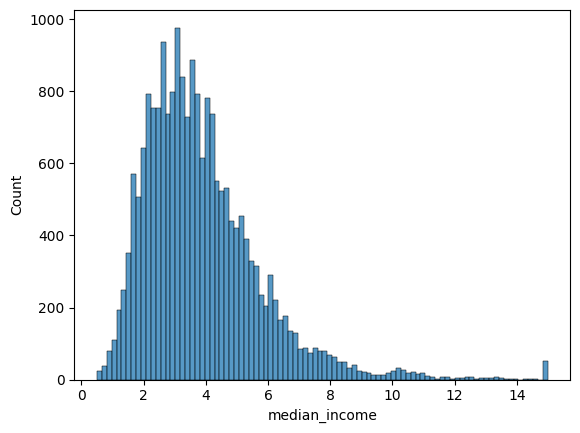

In [15]:
sns.histplot(data=housing, x='median_income');

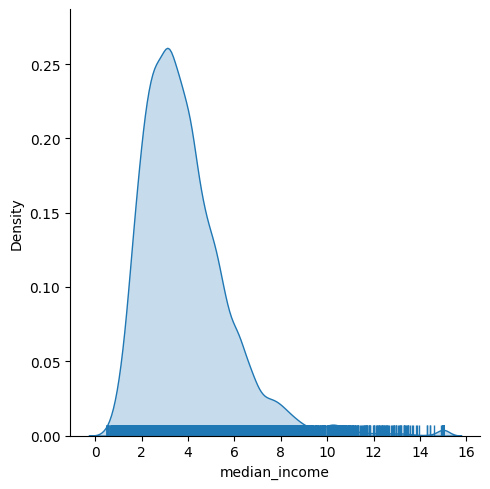

In [16]:
sns.displot(data=housing,
            x='median_income',
            kind='kde',
            fill=True,
            rug=True);

- `housing_median_age` was capped

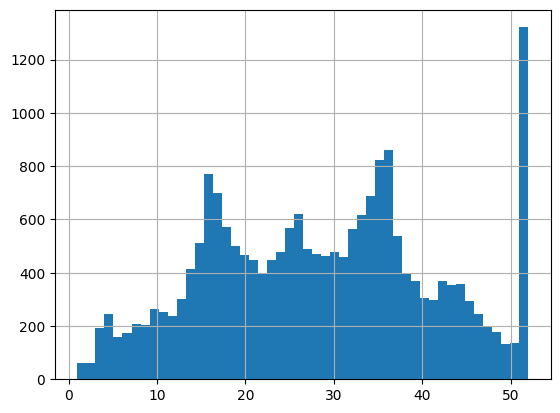

In [17]:
housing['housing_median_age'].hist(bins=50);

- `housing_median_value` was capped
    - this could be a serious problem since it is the target variable
    - two options:
        1. collect proper labels for the districts whose labels were capped
        2. remove those districts from the training and test test

<Axes: >

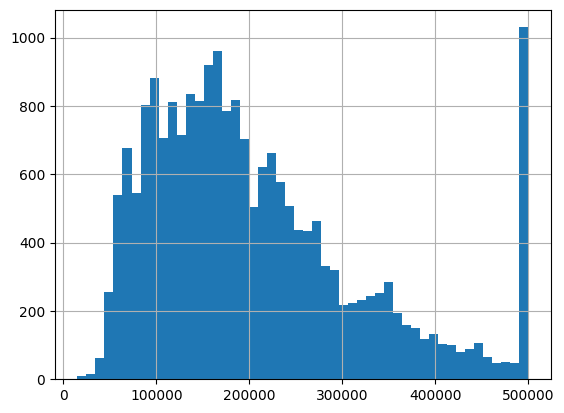

In [18]:
housing['median_house_value'].hist(bins=50)

- Other issues:
    - the attributes have very different scales
    - many of the histograms are skewed right

**IMPORTANT**: Create a test set and set it aside, no snooping

#### Create a Test Set

- the **test set** should be left alone once created
- no further EDA should be done on the test set to avoid **snooping bias**

In [19]:
train_set, test_set = train_test_split(housing,
                                       test_size=0.2,
                                       random_state=42)

train_set.shape, test_set.shape

((16512, 10), (4128, 10))

#### Create a Stratified Test Set

- With **stratified sampling**, the population is divided into homogeneous subgroups called **strata**, and the right number of instances are sampled from each stratum to guarantee that the test set is representative of the overall population
    - for example, a survey, where it is possible that answers will vary across genders, a well conducted survey will maintain the gender ratio from the population in the sample
- Suppose domain experts tell us that median income is a very important attribute for predicting median housing prices
    - It might be a good idea to ensure that the test set is representative of the various categories of incomes in the whole dataset
    - To stratify by **median income**, we need to create `income_cat` feature
- To stratify on more than one variable: https://stackoverflow.com/questions/45516424/sklearn-train-test-split-on-pandas-stratify-by-multiple-columns

In [20]:
# parameters are:
#.  start (included in interval),
#. stop (not included),
# and step
np.arange(0, 1.5, 0.5)

array([0. , 0.5, 1. ])

In [21]:
# - open intervals use parenthesis (), does not included endpoints
# - closed intervals use square brackets [], includes endpints

test = np.concatenate([np.arange(0, 1.5, 0.5),
                       np.arange(1.5, 3.0, 0.5),
                       np.arange(3.0, 4.5, 0.5),
                       np.arange(4.5, 6.0, 0.5),
                       np.arange(6.0, 10, 0.5)
                      ])
test

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ,
       6.5, 7. , 7.5, 8. , 8.5, 9. , 9.5])

In [22]:
# `pd.cut()`: right=True by default (include rightmost edge or not)

# if `bins` is a sequence of scalars, then it defins the bin edges
#. - allows for non-uniform width

test_result = pd.cut(test,
                     bins=[0, 1.5, 3, 4.5, 6, np.inf],
                     labels=[1.5, 3, 4.5, 6, np.inf],
                     right=True)

pd.DataFrame({'test': test, 'result': test_result})

,test,result
0,0.0,NaN
1,0.5,1.5
2,1.0,1.5
3,1.5,1.5
4,2.0,3.0
5,2.5,3.0
6,3.0,3.0
7,3.5,4.5
8,4.0,4.5
9,4.5,4.5


##### Creating the `income_cat` feature for the stratified sample

- Notice that most median incomes are clustered around 1.5 to 6 (15K to 60K)
- Some incomes go way beyond 6
- We don't want too many categories because we want a sufficient number of instances for each stratum
    - If we don't have a sufficient number in each stratum then the stratum's importance may be biased

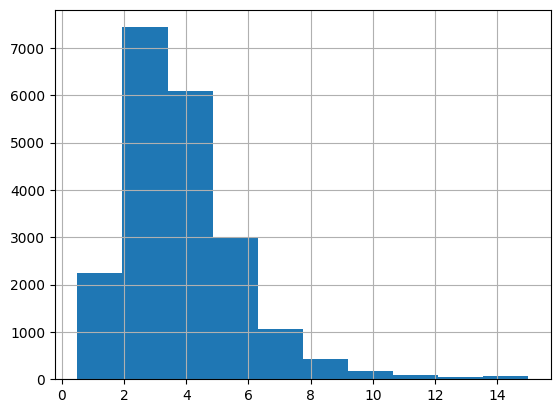

In [23]:
housing['median_income'].hist();

In [24]:
housing['median_income'].min(), housing['median_income'].max()

(0.4999, 15.0001)

In [25]:
housing['income_cat'] = pd.cut(housing['median_income'],
                               bins=[0, 1.5, 3, 4.5, 6, np.inf],
                               labels=[1, 2, 3, 4, 5])

In [26]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   longitude           20640 non-null  float64 
 1   latitude            20640 non-null  float64 
 2   housing_median_age  20640 non-null  float64 
 3   total_rooms         20640 non-null  float64 
 4   total_bedrooms      20433 non-null  float64 
 5   population          20640 non-null  float64 
 6   households          20640 non-null  float64 
 7   median_income       20640 non-null  float64 
 8   median_house_value  20640 non-null  float64 
 9   ocean_proximity     20640 non-null  object  
 10  income_cat          20640 non-null  category
dtypes: category(1), float64(9), object(1)
memory usage: 1.6+ MB


- Note about `groupby`:
    - Use `observed=False`: If you rely on seeing all levels of the income_cat categorical variable (even if some levels have no data).
	- Use `observed=True`: If you only want to group by levels that actually have data in the current DataFrame, which is often more efficient and matches the future default.

In [27]:
housing.groupby('income_cat', observed=False)['median_income'].agg(['count', 'min', 'max'])

,count,min,max
income_cat,,,
1,822,0.4999,1.5000
2,6581,1.5026,3.0000
3,7236,3.0021,4.5000
4,3639,4.5022,6.0000
5,2362,6.0050,15.0001


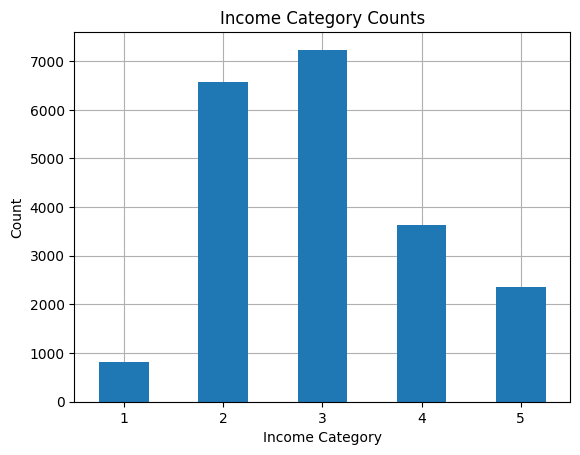

In [28]:
ax = housing['income_cat'].value_counts().sort_index().plot(kind='bar',
                                                            grid=True,
                                                            rot=0,
                                                            xlabel='Income Category',
                                                            ylabel='Count',
                                                            title='Income Category Counts')

ax.set_axisbelow(True)

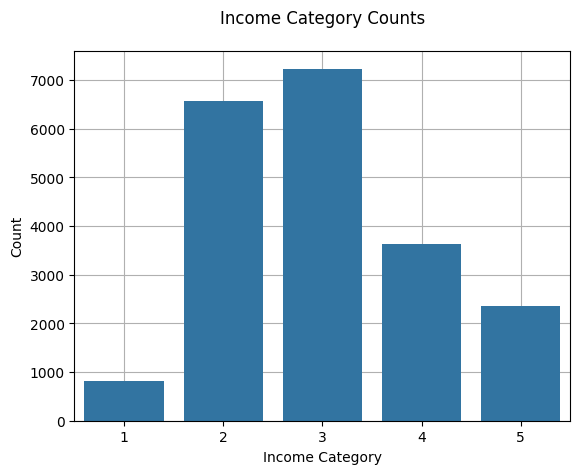

In [29]:
ax = sns.countplot(data=housing,
                   x='income_cat')

ax.set(xlabel='Income Category',
       ylabel='Count',
       axisbelow=True # so grid is under bars
       )

ax.set_title('Income Category Counts', pad=20)
ax.grid();

##### `train_test_split()` with `stratify` argument

- Note that there are a number of strategies for splitting
- `train_test_split()` is a shortcut function
- https://scikit-learn.org/stable/api/sklearn.model_selection.html

In [30]:
# we need the `income_cat` in this split as well
#. - only doing this for comparison
train_set, test_set = train_test_split(housing,
                                       test_size=0.2,
                                       random_state=42)
train_set.shape, test_set.shape

((16512, 11), (4128, 11))

In [31]:
strat_train_set, strat_test_set = train_test_split(housing,
                                                   test_size=0.2,
                                                   stratify=housing['income_cat'],
                                                   random_state=42)
strat_train_set.shape, strat_test_set.shape

((16512, 11), (4128, 11))

In [32]:
overall = housing['income_cat'].value_counts(normalize=True).sort_index() * 100
train = train_set['income_cat'].value_counts(normalize=True).sort_index() * 100
test = test_set['income_cat'].value_counts(normalize=True).sort_index() * 100
strat_train = strat_train_set['income_cat'].value_counts(normalize=True).sort_index() * 100
strat_test = strat_test_set['income_cat'].value_counts(normalize=True).sort_index() * 100

pd.DataFrame({
    'Overall %': overall,
    'Train %': train,
    'Test %': test,
    'Strat_Train %': strat_train,
    'Strat_Test %': strat_test
})

,Overall %,Train %,Test %,Strat_Train %,Strat_Test %
income_cat,,,,,
1,3.982558,3.918362,4.239341,3.978924,3.997093
2,31.884690,32.170543,30.741279,31.885901,31.879845
3,35.058140,35.192587,34.520349,35.059351,35.053295
4,17.630814,17.435804,18.410853,17.629603,17.635659
5,11.443798,11.282703,12.088178,11.446221,11.434109


- We no longer need the `income_cat` column, so we can drop it
- We are putting the `strat_test_set` aside to avoid snooping bias

In [33]:
strat_test_set.columns, strat_train_set.columns

(Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
        'total_bedrooms', 'population', 'households', 'median_income',
        'median_house_value', 'ocean_proximity', 'income_cat'],
       dtype='object'),
 Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
        'total_bedrooms', 'population', 'households', 'median_income',
        'median_house_value', 'ocean_proximity', 'income_cat'],
       dtype='object'))

In [34]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop('income_cat', axis=1, inplace=True)

In [35]:
strat_test_set.columns, strat_train_set.columns

(Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
        'total_bedrooms', 'population', 'households', 'median_income',
        'median_house_value', 'ocean_proximity'],
       dtype='object'),
 Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
        'total_bedrooms', 'population', 'households', 'median_income',
        'median_house_value', 'ocean_proximity'],
       dtype='object'))

In [36]:
housing = strat_train_set.copy()
housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 13096 to 19888
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16344 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   median_house_value  16512 non-null  float64
 9   ocean_proximity     16512 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.4+ MB


### Step 3 Continued: Explore and Visualize the Data to Gain Insights


- The first part of Step 3 was the prelimimary EDA done before creating the test set
- If the data set is too large, consider taking a random sample to use for this stage to make data manipulation easy and fast
- In our case, the data set is not too large

#### Visualizing Geographical Data

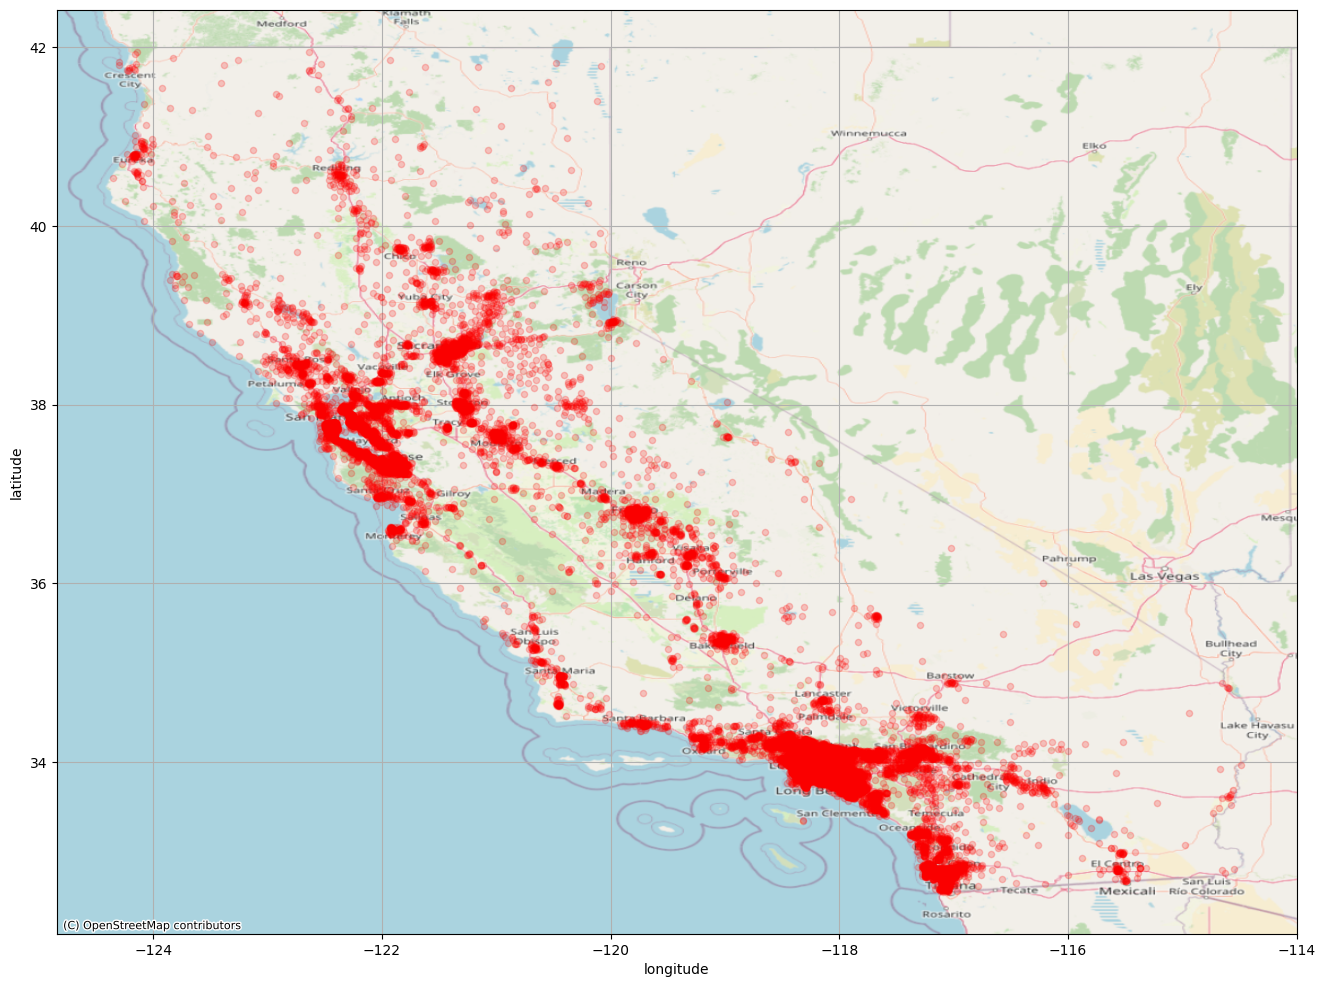

In [37]:
ax = housing.plot(kind='scatter',
                  x='longitude',
                  y='latitude',
                  alpha=0.2,
                  color='red',
                  grid=True,
                  figsize=(16, 12))
ax.set_axisbelow(True)

ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik, crs='epsg:4326')

In [38]:
# this works, but folium maps don't render in GitHub

"""
m = folium.Map(location=[37, -119],
               zoom_start=6.4)

for _, row in housing.iterrows():
    folium.CircleMarker(location=(row['latitude'], row['longitude']),
                        radius=3,
                        fill=True,
                        fill_opacity=0.2,
                        color='red',
                        stroke=True,
                        weight=1,
                        popup=row['population'],
                        highlight=True,   # adds hover effects
                        tooltip='Click for population').add_to(m)

m
""";

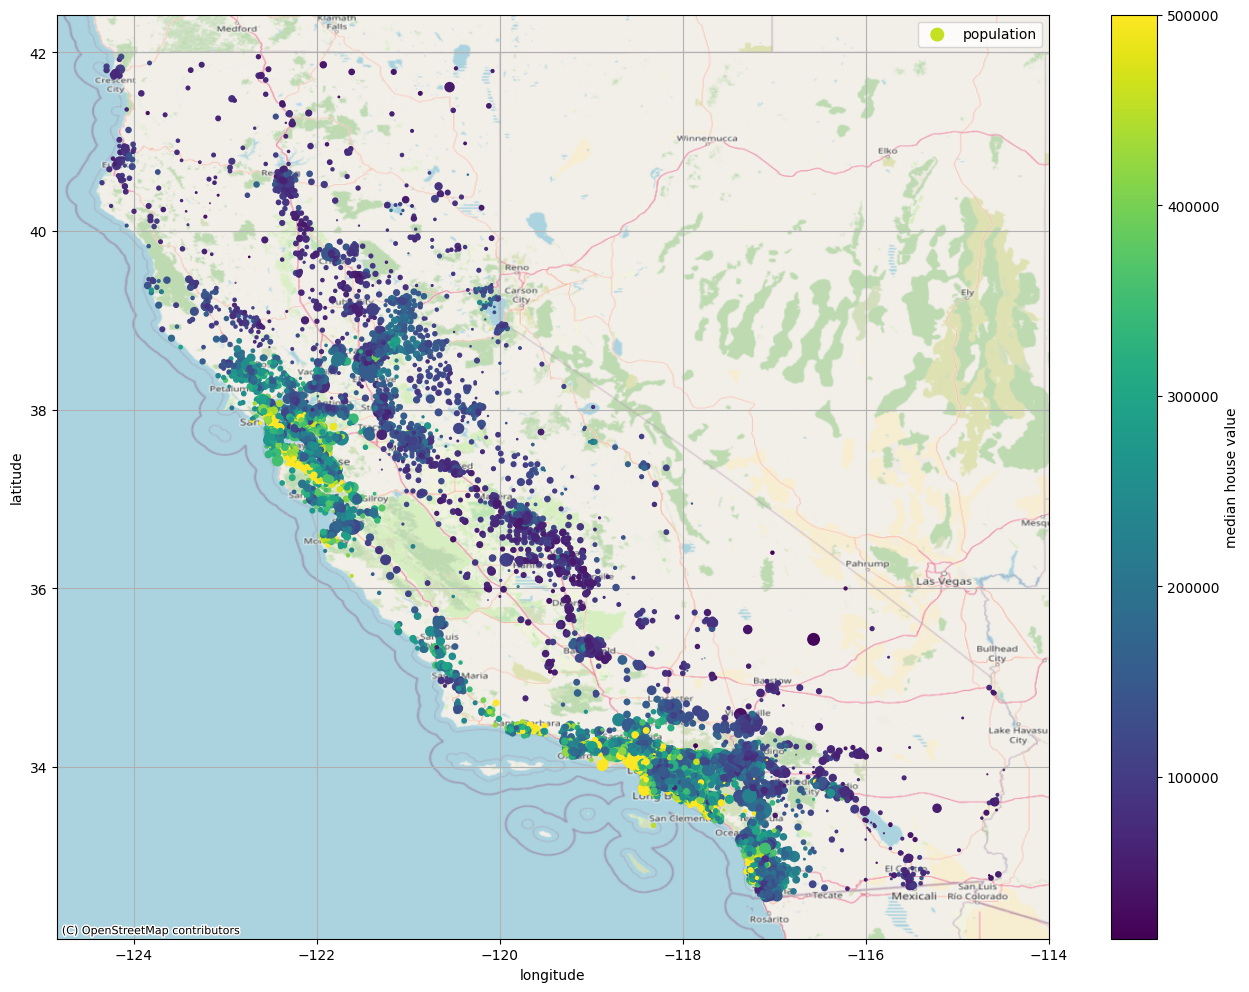

In [39]:
ax = housing.plot(kind='scatter',
                  x='longitude',
                  y='latitude',
                  s=housing['population'] / 100,
                  label='population',
                  legend=True,
                  c='median_house_value',
                  cmap='viridis',
                  colorbar=False, # we want to customize the label
                  grid=True,
                  figsize=(16, 12))

ax.set_axisbelow(True)
cbar = plt.colorbar(ax.collections[0])
cbar.set_label('median house value')

ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik, crs='epsg:4326')

In [40]:
# pop_scale will be used for the radius in the next folium map
r_min = housing['population'].min()
r_max = housing['population'].max()
t_min = 2
t_max = 15

pop_scale = lambda pop : ((pop - r_min) / (r_max - r_min)) * (t_max - t_min) + t_min

pop_scale(r_min), pop_scale(r_max)

(2.0, 15.0)

In [41]:
# my_color_map is for the color in the next folium map
my_color_map = cm.linear.viridis.scale(housing['median_house_value'].min(),
                                       housing['median_house_value'].max())

my_color_map.tick_labels = [100_000, 200_000, 300_000, 400_000, 500_000]
my_color_map.caption = 'test'

In [42]:
# folium maps don't render on GitHub

"""
m = folium.Map(location=[37, -119],
               zoom_start=6.4)

for i, row in housing.iterrows():
    folium.CircleMarker(location=(row['latitude'], row['longitude']),
                        radius=pop_scale(row['population']),
                        fill_color=my_color_map(housing['median_house_value'][i]),
                        fill=True,
                        fill_opacity=0.8,
                        stroke=False).add_to(m)


my_color_map.add_to(m)
m
""";

###### What does the Geographic Visualization tell us?

- Housing prices are very much related to location
    - Close to ocean means higher price
    - Close to population centre means higher price
- A **clustering algorithm** should be useful for detecting the main clusters and for adding new features that measure proximity to the cluster centres
- The `ocean_proximity` feature may be useful as well, but it doesn't apply to Northern California

#### Look for Correlations